In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

import kraft

In [16]:
n_element = 10000

_2_sided = True

fraction_top = 0.1

rate_hit = 0.1

if _2_sided:
    
    fraction_top /= 2

n_top = int(fraction_top * n_element)

rate_hit = int(rate_hit * n_top)

n_top, rate_hit

(500, 50)

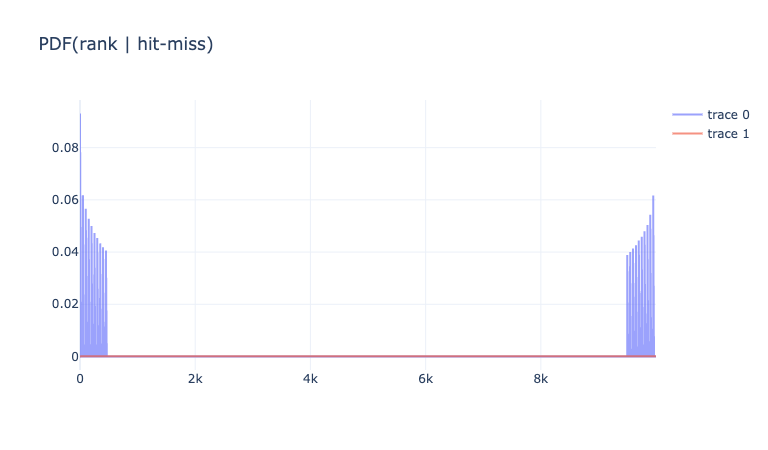

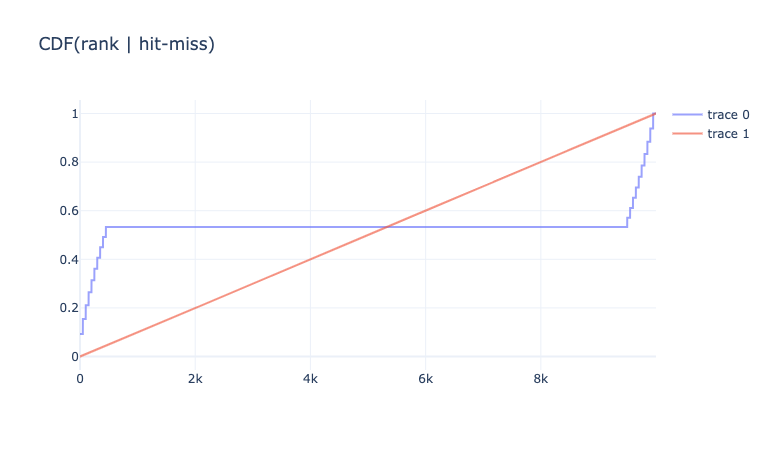

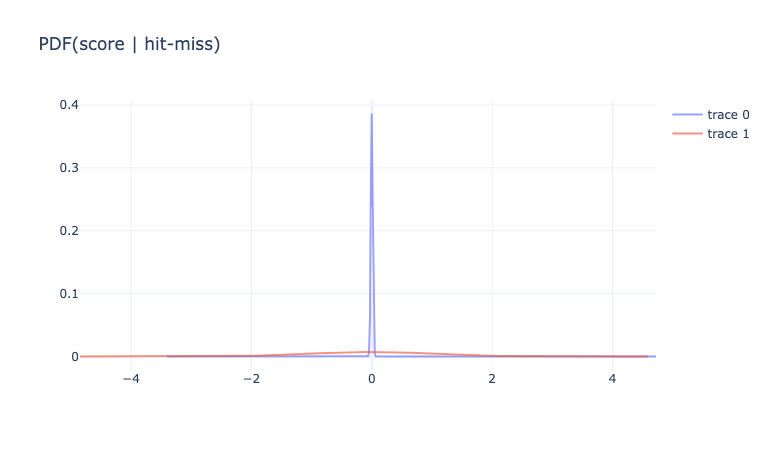

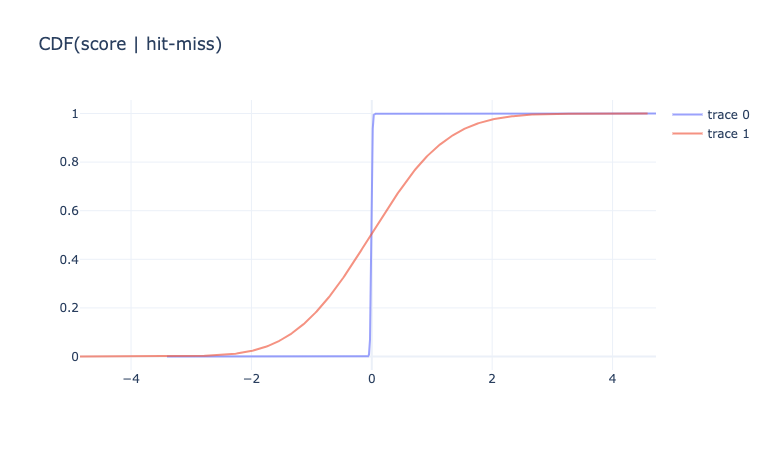

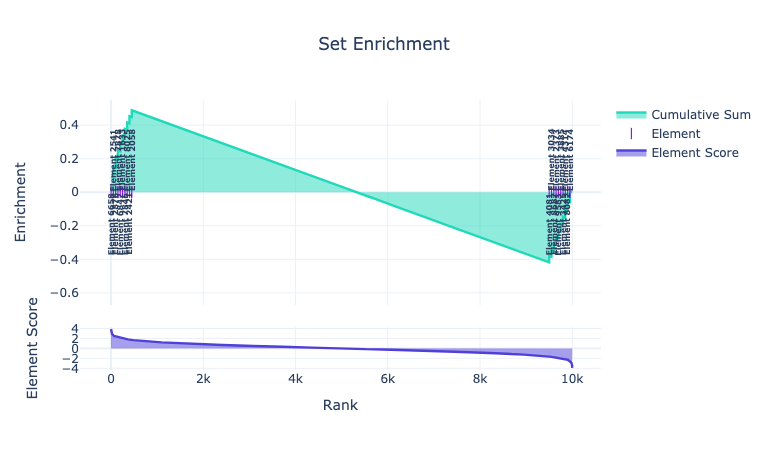

0.4882995218418364

In [17]:
element_score = pd.Series(
    np.random.normal(size=n_element),
    index=("Element {}".format(i) for i in range(n_element)),
).sort_values(ascending=False)

    
set_elements = element_score.index[:n_top:rate_hit].tolist()
    
if _2_sided:
    
    set_elements += element_score.index[-n_top::rate_hit].tolist()

kraft.compute_set_enrichment(element_score, set_elements, statistic="rcks")